In [1]:
import numpy as np
import os.path as osp
from scipy.io import loadmat
from numpy.random import choice
from geo_tool import Point_Cloud
from general_tools.in_out.basics import create_dir

/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/geo_tool/solids/mesh.py:26: UserWarning: Mayavi library was not found. Some graphics utilities will be disabled.
  warnings.warn('Mayavi library was not found. Some graphics utilities will be disabled.')


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Parameters
class_name = 'gun'
mit_data = '/orions4-zfs/projects/lins2/Panos_Space/DATA/NIPS/mit_3dgan_1K_synthetic_samples/voxel_grids'
mit_data = osp.join(mit_data, class_name + '_sample.mat')

n_pc_points = 2048
out_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/NIPS/mit_3dgan_1K_synthetic_samples/point_clouds'
out_data_dir = osp.join(out_data_dir, str(n_pc_points))
create_dir(out_data_dir)

'/orions4-zfs/projects/lins2/Panos_Space/DATA/NIPS/mit_3dgan_1K_synthetic_samples/point_clouds/2048'

In [4]:
mit_data = loadmat(mit_data)
n_samples = len(mit_data['voxels'])
gen_data = np.zeros((n_samples, n_pc_points, 3))

In [5]:
def voxel_field_to_point_cloud(voxel_field, n_points):
    weights = voxel_field.reshape(-1) / np.sum(voxel_field)
    elements = range(len(weights))    
    indices = choice(elements, p=weights, size=n_points, replace=False)
    pc = np.zeros_like(voxel_field)
    pc = pc.reshape(-1)
    pc[indices] = 1
    pc = pc.reshape(voxel_field.shape)
    x, y, z = np.where(pc)
    points = np.vstack((x, y, z)).T
    return points.astype(np.float32)
    

In [6]:
for i, voxel_field in enumerate(np.squeeze(mit_data['voxels'])):
    pc = voxel_field_to_point_cloud(voxel_field, n_pc_points)
    pc = Point_Cloud(pc)
    pc.permute_points([0,2,1])
    gen_data[i] = pc.points

In [7]:
np.savez(osp.join(out_data_dir, class_name), gen_data)

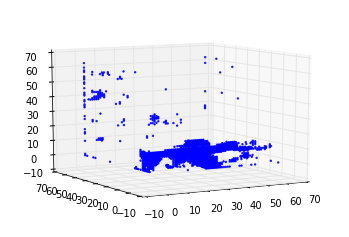

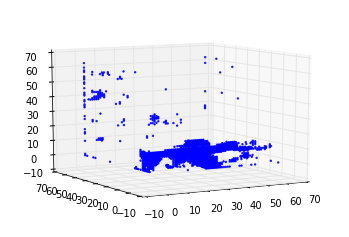

In [15]:
pc = Point_Cloud(gen_data[0]).permute_points([0,2,1])
pc.plot()